# LOAN_PRICE_PREDICTION_RANDOMFOREST_REGRESSOR_MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing 

In [2]:
#loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv('gold_price_data.csv')

In [3]:
#print top 5 rows of the dataset
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Means we have data from 2008 to 2018

In [6]:
#number of rows and column
gold_data.shape

(2290, 6)

In [7]:
#getting basic information of the dataset 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
#checking the number of missing values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting the statistical measures 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Coorelation :
    1. Positive Coorelation
    2. Negative Coorelation

In [11]:
print(gold_data.dtypes)

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [12]:
#Dropping date column for finding coorelation
numeric_data = gold_data.drop(columns =['Date']).select_dtypes(include=['float64','int64'])

In [13]:
correlation =numeric_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

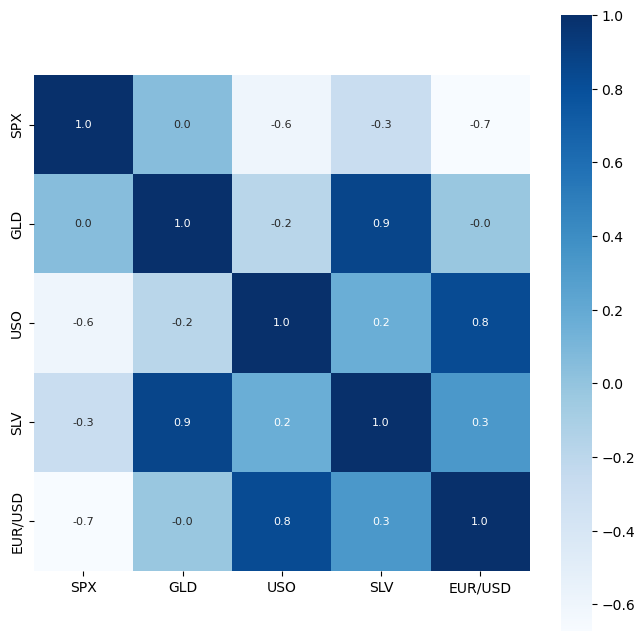

In [14]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt= '.1f', annot = True,annot_kws={'size':8},cmap='Blues')

In [15]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\kanik\AppData\Local\Temp\ipykernel_13228\1030294359.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

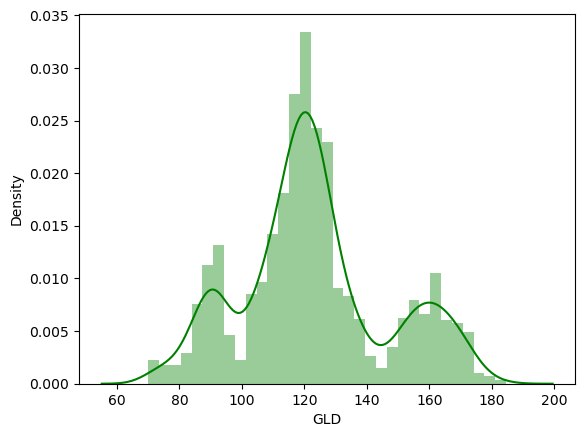

In [16]:
#checking the distribution of the GLD price
sns.distplot(gold_data['GLD'],color='green')

### Splitting the features and targets


In [17]:
X = gold_data.drop(['Date','GLD'], axis = 1)
Y = gold_data['GLD']

In [18]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Splitting into Training data and testing data

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2,random_state=2)

Model Training: Random Forest Regressor

In [20]:
regressor= RandomForestRegressor(n_estimators=100)

In [21]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### Model Evaluation

In [22]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[168.69719955  82.26019978 115.85239955 127.65540082 120.77450139
 154.75959774 150.25649851 126.00780027 117.51509858 126.01080044
 116.70000074 171.046501   141.88659898 167.79669914 114.99460022
 117.33960032 138.05970305 170.15890082 159.53580298 158.61149909
 155.17970038 125.24200019 176.42039953 157.66680283 125.1397007
  93.80439924  78.3238001  120.68000013 119.08949905 167.5306004
  88.03360081 125.05769984  91.29720069 117.85529994 121.16179933
 136.18520051 115.39480109 115.54610071 146.10609954 107.16160087
 104.93400241  87.27469778 126.49320084 118.02580021 154.62049945
 119.37700038 108.48029981 108.12969818  93.2927007  126.92479829
  75.31250025 113.54169906 121.27450023 111.19109916 118.86999914
 120.59649965 159.58679986 168.49200163 147.03269683  85.58349843
  94.2063002   86.7202993   90.65300017 118.99850065 126.39550064
 127.52979965 169.8898     122.27149909 117.40899899  98.47850035
 168.16550114 142.61839801 132.49370273 121.18650213 121.78529942
 119.5972008

In [24]:
#R suared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9895254856534407


Comparing the Actual Values and Predicted Values in pLot 

In [25]:
Y_test = list(Y_test)

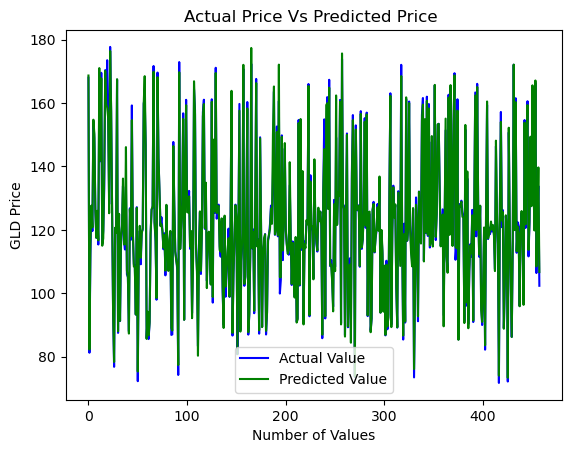

In [26]:
plt.plot(Y_test, color='blue',label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price ')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


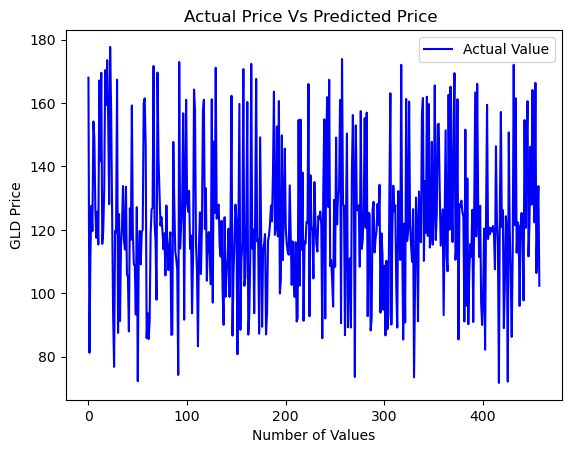

In [27]:
plt.plot(Y_test, color='blue',label = 'Actual Value')
#plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price ')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()


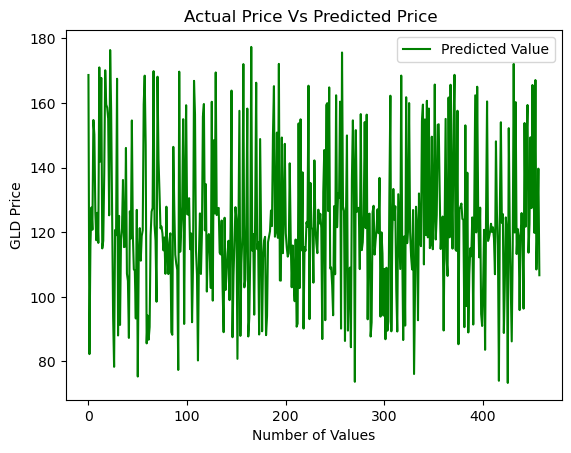

In [28]:
#plt.plot(Y_test, color='blue',label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price ')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
